    Assignment 2 - Abalone

In [36]:
from matplotlib import pyplot
%matplotlib inline
import pandas as pd   # Import the pandas module (this also imports matplotlib)
import seaborn as sns # Override the default matplotlib options to make our plots look nice
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [37]:
path_to_csv_file = "abalone.csv"
names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

In [38]:
#df = pd.read_csv(path_to_csv_file, index_col=False)
df = pd.read_csv(path_to_csv_file,skiprows=1, names=names)

In [39]:
df.shape

(4177, 9)

In [40]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4176.000000,4177.000000,4177.000000,4177.000000,4176.000000
mean,0.523992,0.407881,0.139516,0.828419,0.359367,0.180594,0.238831,9.930795
std,0.120093,0.099240,0.041827,0.491041,0.221963,0.109614,0.139203,3.228948
min,0.075000,0.055000,0.000000,-0.738000,0.001000,0.000500,0.001500,-1.000000
25%,0.450000,0.350000,0.115000,0.441375,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [41]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [42]:
df = df.drop(df.index[[1257,3996,3291,1858,3505,3800,2051,335,112]])
#shuffle data
df = df.sample(frac=1).reset_index(drop=True)

In [43]:
# for more complicated cases use sklearn.feature_extraction.DictVectorizer
#for label in "MFI":
#    data[label] = data["sex"] == label
#del data["sex"]
mapping = dict(zip(["I", "F", "M"], [0,1,2]))
df.replace({"Sex": mapping}, inplace=True)
#double check there is no NA data and drop if exists
df = df.dropna()

In [44]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.675,0.510,0.185,1.4730,0.6295,0.3025,0.4245,11.0
1,2,0.610,0.365,0.155,1.0765,0.4880,0.2490,0.2700,9.0
2,2,0.340,0.275,0.090,0.2065,0.0725,0.0430,0.0700,10.0
3,2,0.565,0.465,0.150,1.1285,0.3770,0.3525,0.3300,16.0
4,0,0.475,0.335,0.100,0.4425,0.1895,0.0860,0.1350,9.0


Below are all the diagrams that are included in the report, I also ran these in pycharm to save the images to disk using for example "g.savefig("output2.png")"

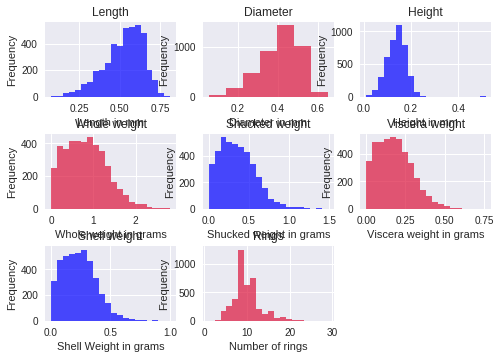

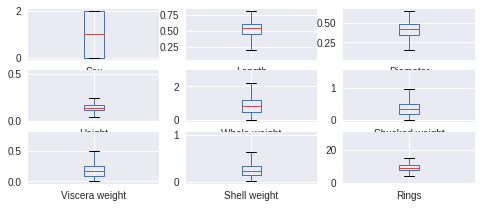

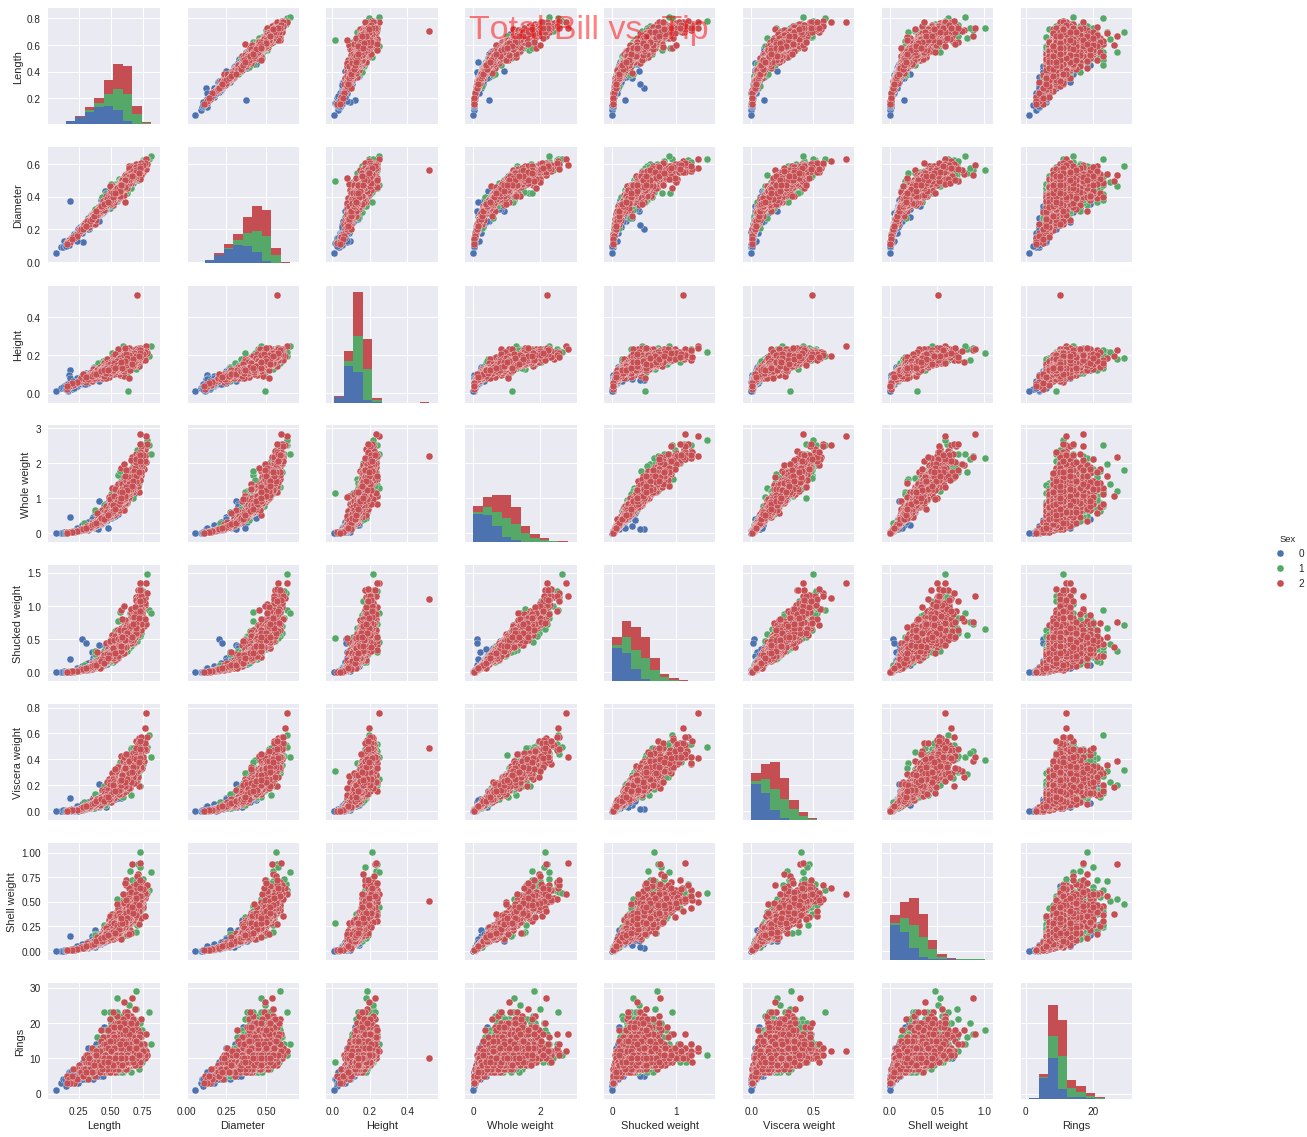

In [45]:
sns.set()

#rows, columns, position

pyplot.subplot(3,3,1)
pyplot.hist(df['Length'],bins=20, color='blue', alpha=0.7)
pyplot.ylabel('Frequency')
pyplot.xlabel('Length in mm')
pyplot.title('Length')


pyplot.subplot(3,3,2)
pyplot.hist(df['Diameter'],bins=7, color='crimson', alpha=0.7)
pyplot.ylabel('Frequency')
pyplot.xlabel('Diameter in mm')
pyplot.title('Diameter')
pyplot.subplots_adjust(hspace=.5)

pyplot.subplot(3,3,3)
pyplot.hist(df['Height'],bins=20, color='blue', alpha=0.7)
pyplot.ylabel('Frequency')
pyplot.xlabel('Height in mm')
pyplot.title('Height')

pyplot.subplot(3,3,4)
pyplot.hist(df['Whole weight'],bins=20,color='crimson', alpha=0.7)
pyplot.ylabel('Frequency')
pyplot.xlabel('Whole weight in grams')
pyplot.title('Whole weight')

pyplot.subplot(3,3,5)
pyplot.hist(df['Shucked weight'],bins=20, color='blue', alpha=0.7)
pyplot.ylabel('Frequency')
pyplot.xlabel('Shucked weight in grams')
pyplot.title('Shucked weight')

pyplot.subplot(3,3,6)
pyplot.hist(df['Viscera weight'],bins=20, color='crimson', alpha=0.7)
pyplot.ylabel('Frequency')
pyplot.xlabel('Viscera weight in grams')
pyplot.title('Viscera weight')

pyplot.subplot(3,3,7)
pyplot.hist(df['Shell weight'],bins=20,color='blue', alpha=0.7)
pyplot.ylabel('Frequency')
pyplot.xlabel('Shell Weight in grams')
pyplot.title('Shell weight')

pyplot.subplot(3,3,8)
pyplot.hist(df['Rings'],bins=20, color='crimson', alpha=0.7)
pyplot.ylabel('Frequency')
pyplot.xlabel('Number of rings')
pyplot.title('Rings')


df.plot(kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False)


vars=["Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
g = sns.pairplot(df, vars=vars, hue="Sex",size=2)
g.fig.get_children()[-1].set_bbox_to_anchor((1.1, 0.5, 0, 0))
g.savefig("output2.png")


# Set the Title of the graph from here
g.fig.suptitle('Total Bill vs. Tip', fontsize=34,color="r",alpha=0.5)


pyplot.show()


This is the first attempt at creating prediction model 


In [46]:
from math import sqrt
import numpy
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE


filename = "abalone.csv"
names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
y_axis = ['Rings']

dataset = read_csv(filename, skiprows=1, names=names)

#drop outliers, erronous and missing data
dataset = dataset.drop(dataset.index[[1257, 3996, 3291, 1858, 3505, 3800, 2051, 335, 112]])

#shuffle data
dataset = dataset.sample(frac=1).reset_index(drop=True)

#Map Male, Female and Infant to 0,1,2
mapping = dict(zip(["I", "F", "M"], [0, 1, 2]))
dataset.replace({"Sex": mapping}, inplace=True)

#Add a a new feature called Volume, its length * diameter * height
dataset.loc[:, 'Volume'] = dataset['Length'].values * dataset['Diameter'].values * dataset['Height'].values

#Drop any NA data from datset
dataset = dataset.dropna()


#Set up the names array
names = ['Sex','Volume', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
          'Viscera weight','Shell weight','Rings']
dataset = dataset[names]

array = dataset.values
#x-axis
X = array[:,0:9]
#Y-axis
Y = array[:,9]

# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#10 kfold setup
num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=seed)


alphas = numpy.array([0.01,0.009,0.008,0.007,0.006,0.005,0.004,0.003,0.002,0.001,0])
param_grid = dict(alpha=alphas)

model_before_cv = Ridge()

grid = GridSearchCV(model_before_cv, param_grid=param_grid,cv=10)
grid_result = grid.fit(X_train, Y_train)

#print(grid.best_score_)
print("Best esitimator?: %f " % grid.best_estimator_.alpha)
alpha = grid.best_estimator_.alpha
print("Alpha?: %f " % alpha)

# 10 kflod end

#final trining model

model_with_alpha = Ridge(alpha=alpha,fit_intercept=False)

#Create RFE
model_with_alpha = RFE(model_with_alpha, 7)
#train
fit = model_with_alpha.fit(X_train, Y_train)

#predict
y_pred = model_with_alpha.predict(X_validation)

#cross validation hold out
result_validation = model_with_alpha.score(X_validation, Y_validation)

#all data
results = cross_val_score(model_with_alpha, X, Y, cv=kfold)

# Make predictions about the test data

# Print error measurements
print("")
print("Rfe Num Features: %d") % fit.n_features_
print("Rfe Selected Features: %s") % fit.support_
print("Rfe Feature Ranking: %s") % fit.ranking_
print("")
print('MAE: %.2f ' % mean_absolute_error(Y_validation, y_pred))
print('RMSE: %.2f ' % sqrt(mean_squared_error(Y_validation, y_pred)))
print("")
print("Cross Validation Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)
print("Model Accuracy: %.3f%%") % (result_validation*100.0)
print("")
print('Coeffients: ')
print(fit.estimator_.coef_)
print("")

Best esitimator?: 0.002000 
Alpha?: 0.002000 

Rfe Num Features: 7
Rfe Selected Features: [False  True False  True  True  True  True  True  True]
Rfe Feature Ranking: [3 1 2 1 1 1 1 1 1]

MAE: 1.59 Gb/s
RMSE: 2.22 Gb/s

Cross Validation Accuracy: 54.044% (4.787%)
Model Accuracy: 51.515%

Coeffients: 
[-114.62640844   11.48991465   46.88561744   10.55075322  -18.95269505
   -9.91641418   10.57934188]



In [1]:
import numpy
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


filename = "abalone.csv"
names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
y_axis = ['Rings']

dataset = read_csv(filename, skiprows=1, names=names)

#drop outliers, erronous and missing data
dataset = dataset.drop(dataset.index[[1257, 3996, 3291, 1858, 3505, 3800, 2051, 335, 112]])
#shuffle data
dataset = dataset.sample(frac=1).reset_index(drop=True)

dataset.loc[:, 'Volume'] = dataset['Length'].values * dataset['Diameter'].values * dataset['Height'].values

mapping = dict(zip(["I", "F", "M"], [0, 1, 2]))
dataset.replace({"Sex": mapping}, inplace=True)


dataset = dataset.dropna()

#x_axis = df.columns.tolist()
names = ['Sex','Volume', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
          'Viscera weight','Shell weight','Rings']
dataset = dataset[names]

# Split-out validation dataset
array = dataset.values
X = array[:,0:9]
Y = array[:,9]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=seed)


## K neartest neighbours algorithm tuning

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Tune scaled Gradient Boosting Regressor
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([60,80,100,120,140,160,180,200,220]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Make predictions on validation dataset

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

# validation dataset transformed   
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print(mean_squared_error(Y_validation, predictions))




Best: -4.944212 using {'n_neighbors': 17}
Best: -4.611234 using {'n_estimators': 100}
5.63403052249
